---
layout: post
title: Monte Carlo Estimation of Pi
date: 2014-08-19 14:22
category: Science
tags: excel, monte-carlo, pi, python, simulation, wordpress
mathjax: true
--- 

Yesterday, I came across a neat way to approximate π using [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method). I hadn't seen this exercise before, but I think it is understandable and illustrative, so I decided to give it a try using both Excel and Python.  

**How it Works**

Imagine we have a unit circle inscribed within a 2x2 square.

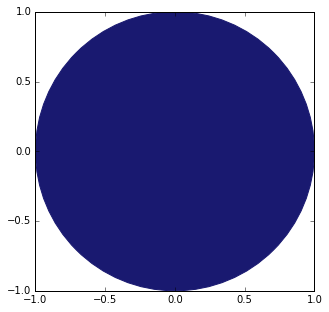

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlim(xmin=-1)
plt.ylim(ymin=-1)
circle1=plt.Circle((0,0),1,color='MidnightBlue')
fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.set_size_inches(5, 5)

Now, let's zoom into the top-right quadrant of this plot.

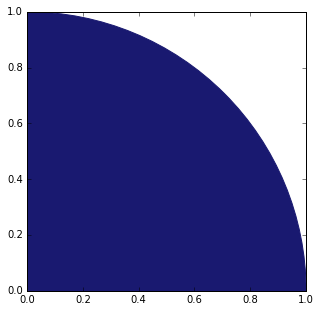

In [2]:
circle2=plt.Circle((0,0),1,color='MidnightBlue')
fig = plt.gcf()
fig.gca().add_artist(circle2)
fig.set_size_inches(5, 5)

The area of this entire quadrant is equal to r<sup>2</sup> (since the base of the square equals the circle's radius). The area in blue is a quarter-circle and is equal to (1/4)πr<sup>2</sup>. Thus, if one were to plot points within this quadrant at random, we would expect that π/4 (approximately 78.54%) would lie within the blue region. Theoretically, then, to estimate π, one can generate a bunch of coordinate pairs with x and y values between 0 and 1. If the distance of a particular point from the origin is greater than 1 (greater than the radius of the circle), it is classified as outside of the circle. Otherwise, it is contained within the circle. With a large enough sample, the proportion of points within the circle should be close to π/4. We can then multiply this proportion by 4 to estimate π.

To get the distance of a point from the origin, we use the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem):

Distance=$\sqrt{x^{2} + y^{2}}$.

**Executing this using Excel**

To carry out this process in Excel, I created two separate sets of
11,175 random numbers between 0 and 1 using the ``=RAND()`` function. I then
calculated the distance for each pair. Next, I used an ``=IF()`` function to
generate indicator variables corresponding to whether or not the
calculated distance was greater than 1. Finally, I used ``=COUNTIF()`` to
count those distances less than or equal to 1, divided this count by the
total number of distances calculated (11,175), and multiplied this
fraction by 4 to get an estimate of π.

Once all of this is in place, it is quick and easy to get estimates by
pressing ``F9`` to refresh the random numbers.

Here are 10 of the estimates I generated (accurate to 5 digits):

3.14917, 3.12447, 3.14309, 3.13879, 3.14452, 3.14130, 3.12197, 3.12841,
3.13128, 3.15347

For reference, the true value of π to 5 digits is 3.14159.

[Here is a
spreadsheet](https://jskaza.files.wordpress.com/2014/08/monte_carlo_est_pi.xls) setup
to carry out this simulation exercise.

**Executing this using Python**

Using 100,000 random number pairs, here are 10 estimates that I got:

In [3]:
#single point estimate
import random
from math import *
from __future__ import division

i=0
for i in range(10):
    n=100000 #number of random number pairs
    my_randoms = [] #create empty list to store distance calculations
    for _ in range(0,n):
        my_randoms.append(sqrt((random.random()**2) + (random.random()**2))) #distance calculation
    pi_estimate=(sum(x<=1 for x in my_randoms)/n)*4
    print(pi_estimate,)
    i+=1
    

3.13704
3.1436
3.13956
3.14492
3.13784
3.1414
3.14296
3.13688
3.144
3.146


Simulating this process programatically also allowed me to go one step
further. Again, I used the random number pairs to generate an estimate
of π (this time "only" 10,000 pairs to spare my computer from the extra
calculations). However, using a nested for-loop, I repeated this process
10,000 times! One can then take the average of the 10,000 π estimates to
get an even better approximation of π. Additionally, one can test the
validity of the [Central Limit
Theorem](http://en.wikipedia.org/wiki/Central_limit_theorem) to see if
the 10,000 estimates are normally distributed.

Here's my Python code to do just this:

Estimate: 3.141337599999959


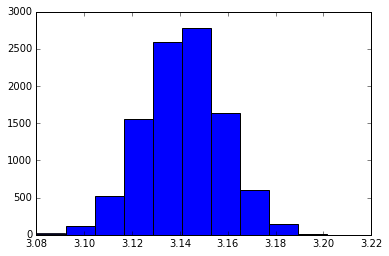

In [4]:
# average of 10,000 estimates
import random
from math import *
from __future__ import division
import matplotlib.pyplot as plt

n1= 10000 # number of pi estimates 
n2= 10000 # number of random number pairs to use in pi estimate

pi_list=[] # create empty list to store pi estimates

for _ in range(0,n1): # n1 iterations
    my_randoms=[]  # create empty list to store distance calculations
    for _ in range(0,n2):
        my_randoms.append(sqrt((random.random()**2) + (random.random()**2))) # distance calculation
    pi_list.append((sum(x<=1 for x in my_randoms)/n2)*4)

print("Estimate:", sum(pi_list) / float(len(pi_list))) # average pi estimate

_ = plt.hist(pi_list) # histogram of pi estimates